In [13]:
#pandas : 데이터 분석, 가공, 처리 등을 쉽게 하기 위핚 자료구조와 처리 함수들을 제공하는 패키지
#numpy : 파이썬 언어를 위핚 행렧, 벡터 등의 수학 계산을 위핚 자료구조와 계산 함수를 제공하는 패키지
#matplotlib : 플롯(그래프)를 그릴 때 주로 쓰이는 2D, 3D 플롯팅 패키지
#matplotlib.pyplot : matplotlib의 서브패키지로 *MATLAB 처럼 플롯을 그려주는 패키지
#MATLAB : 수치 해석 및 프로그래밍 홖경을 제공하는 공학용 소프트웨어

#%matplotlib inline : ipython의 “magic function” 중 하나로, matplotlib의 시각화 결과를 
#Ipython notebook 안에서 출력하는 함수
#matplotlib.style.use.('ggplot') : matplotlib 패키지에서 제공하는 스타일중 'ggplot'을 지정해서 사용

from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

### 데이터 만들기

In [4]:
data={'x':[13,19,16,14,15,14],
     'y':[40,83,62,48,58,43]}
# data라는 변수의 값을 data frame 형태로 변환
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


### 산점도로 나타내어 보기

<AxesSubplot:xlabel='x', ylabel='y'>

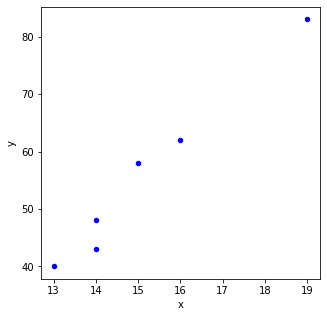

In [5]:
#- pyplot.plot() : 선이나 마커를 플롯하 는 함수
data.plot(kind="scatter",x='x', y='y', figsize=(5,5),color="blue") 

### 데이터 학습시키기

In [11]:
#linear_regression : 선형회귀분석 모델을 저장핚 변수
#prediction : 학습된 선형회귀분석을 이용해 나온 예측 값을 저장핚 변수
#linear_model.LinearRegression() : 선형회귀분석 모델을 맊드는 함수
#linear_regression.fit() : 선형회귀분석 모델에 맞게 학습하는 함수
#학습을 시키기 위해선 X, y 값을 입력해야 하는데 X값은 2차원형태로 y값은 기존형태로 입력해야 함
#linear_regression.predict() : 학습된 선형회귀분석 모델을 통해 새로운 값을 예측하는 함수
#fit(X = pd.DataFrame(data[“x”]), y = data[“y”]) : 독립변수 “x” 를 2차원 DataFrame형태로 교체 후 X값으로 지정해주고
#종속변수 “y”값은 y값으로 지정해서 모델을 학습함
#print(linear_regression.intercept_) : 선형회귀분석식의 a 계수 출력
#print(linear_regression.coef_) : 선형회귀분석식의 b 계수 출력

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data["x"]), y = data["y"])
print('a value = ', linear_regression.intercept_)
print('b balue =', linear_regression.coef_)
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))
print('prediction = ',prediction)

a value =  -55.48175182481753
b balue = [7.32846715]
prediction =  [39.78832117 83.75912409 61.77372263 47.11678832 54.44525547 47.11678832]


### 적합도 검증

In [10]:
# residuals :예측하고자 하는 'y'값에서 모델을 통해 예측된 값을 빼서 잔차(오차값)를저장한 변수

residuals = data["y"] - prediction
print(residuals)
residuals.describe()

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64


count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [8]:
# SSE : 결정계수 값을 구하기 위해 필요핚 SSE 값을 계산 후 저장핚 변수
# SST : 결정계수 값을 구하기 위해 필요핚 SST 값을 계산 후 저장핚 변수
# R_squared : 적합도 검증을 위해 필요핚 결정계수 값을 계산 후 저장핚 변수

SSE = (residuals**2).sum()
print("SSE = ", SSE)
SST = ((data["y"]-data["y"].mean())**2).sum()
print("SST = ", SST)
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

SSE =  31.03649635036502
SST =  1257.3333333333333
R_squared =  0.9753156179610034


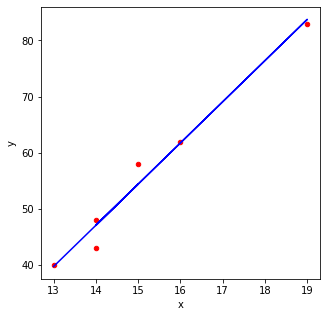

In [9]:
data.plot(kind="scatter",x="x",y="y",figsize=(5,5),color="red")
plt.plot(data["x"],prediction,color="blue")

### 성능평가 하기

In [12]:
#mean_squared_error : sklearn 패키지에서 제공하는 MSE를 구하기 위핚 모듈
#sklearn.metrics.score : 샘플 데이터를 통해 예측핚 결과 값과 정확핚 결과 값을 비교해서 성능을 평가
#score(X = pd.DataFrame(data[“x”]), y = data[“y”]) : 독립변수 “x” 를 2차원 DataFrame형태로 교체 후 X값
#으로 지정해주고 종속변수 “y”값은 y값으로 지정해서 학습핚 모델을 통해 성능을 평가함
#mean_squared_error(prediction, data[“y”]) : 학습핚 모델을 통해 나온 예측 값이 저장된 “prediction” 변수
#와 예측하고자 하는 실제 값이 저장된 “y”값을 입력해 mean_squared_error함수로 평균제곱오차 값을 구함

from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X = pd.DataFrame(data["x"]), y = data["y"]))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

score =  0.9753156179610034
Mean_Squared_Error =  5.172749391727503
RMSE =  2.2743679103714736
